In [1]:
#basic
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(data.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
numeric_var = data.select_dtypes(include=['float', 'int']).columns[1:-1]
numeric_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [7]:
string_var = data.select_dtypes(include=['object']).columns

In [8]:
data[string_var].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [3]:
X = data.drop(['Id'], axis=1) #will keep the target SalePrice in the frame for future data preprocessing
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((978, 80), (482, 80))

In [4]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
1010    135000
390     119000
1409    215000
847     133500
1284    169000
Name: SalePrice, Length: 482, dtype: int64

In [10]:
#save the initial version of the train and test set for future reference
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

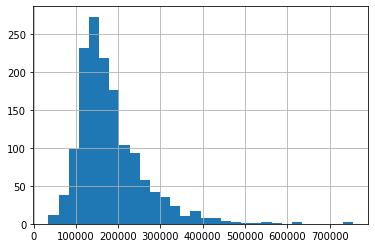

In [11]:
 y.hist(bins=30)
#skewed, but in principle can be a normally distributed outcome var

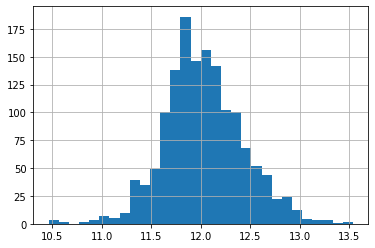

In [12]:
np.log(y).hist(bins=30)
#having the outcome variable following something that is super close to a normal distribution,
#we can focus on explanatory variables in this model having a linear relationship with this var

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

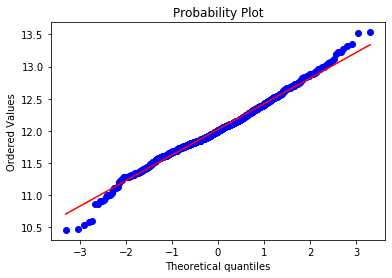

In [13]:
import scipy.stats as stats
stats.probplot(np.log(y), dist="norm", plot=plt)


More EDA

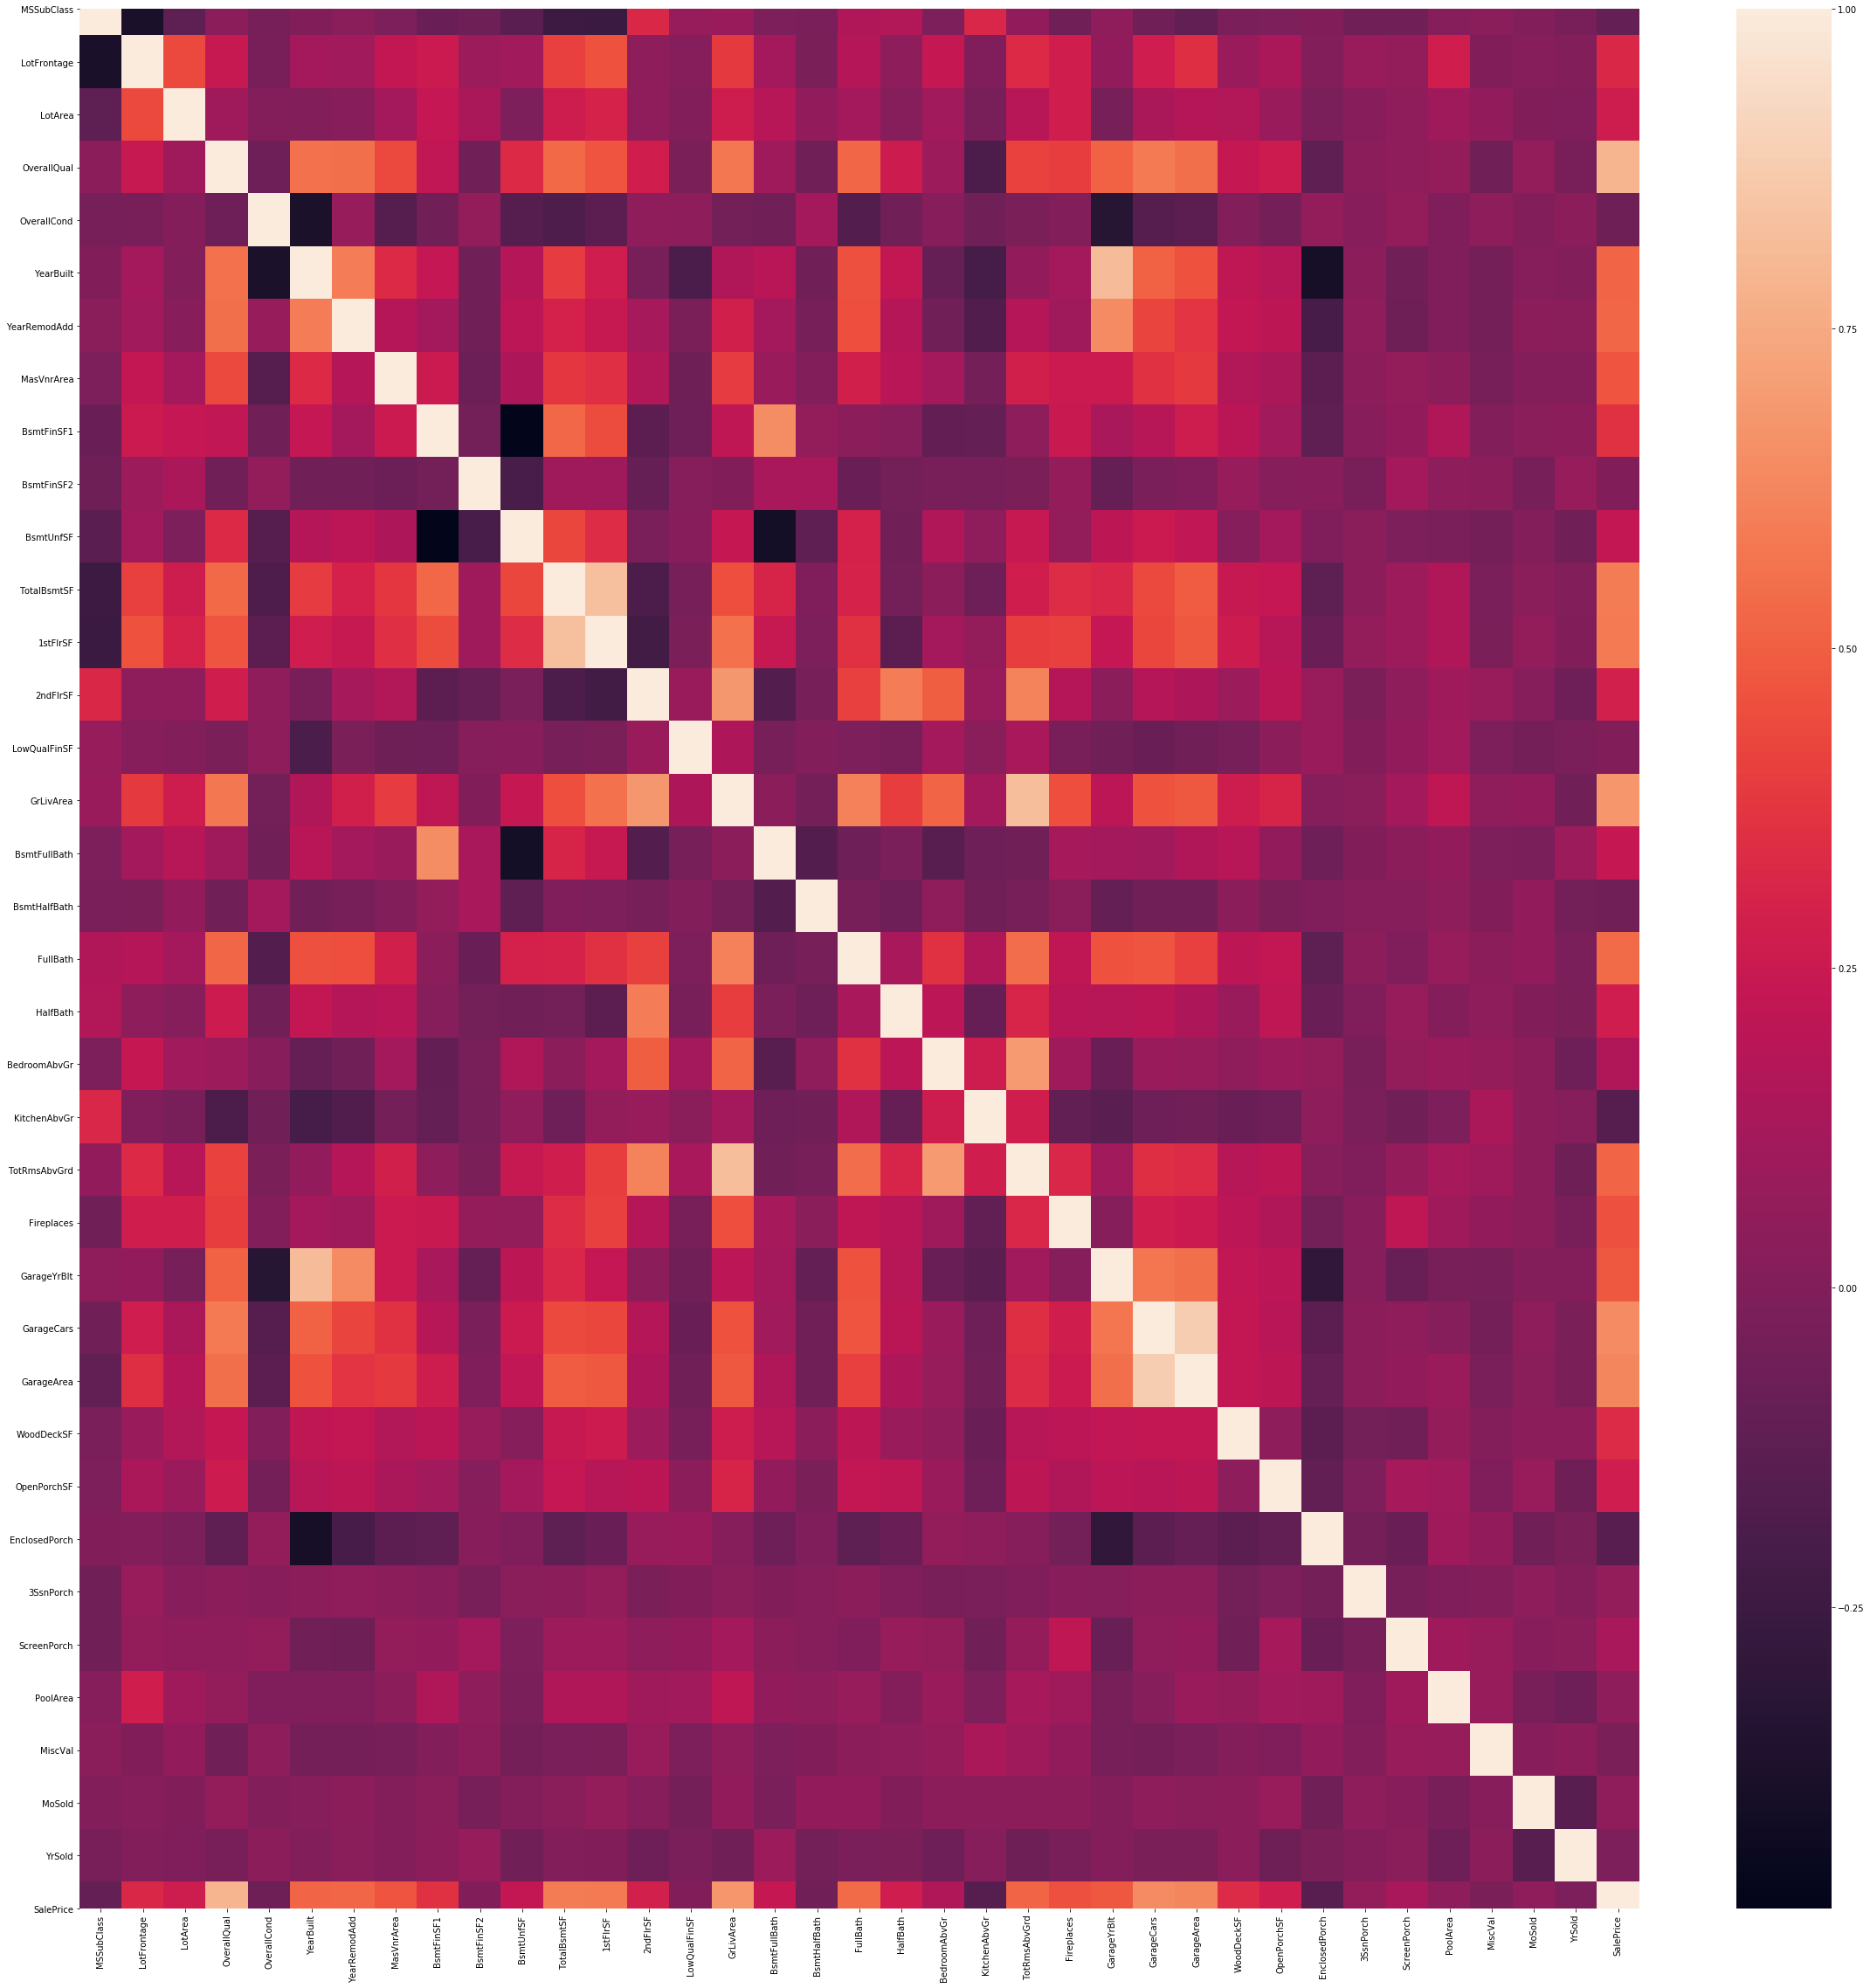

In [14]:
plt.figure(figsize=(40,40))
sb.heatmap(X_train.corr())

Some correlated features:
 - garageyrbuilt with yearbuilt - makes sense
 - grlivinarea with totrmsabvgrd - makes sense
 - garagearea with garage cars - makes sense
 
A few negative correlations:
 - yearbuilt with overallqual - makes sense
 - yearbuilt with overallcond - makes sense
 
Conclusion - there will be variables to remove when selecting features.

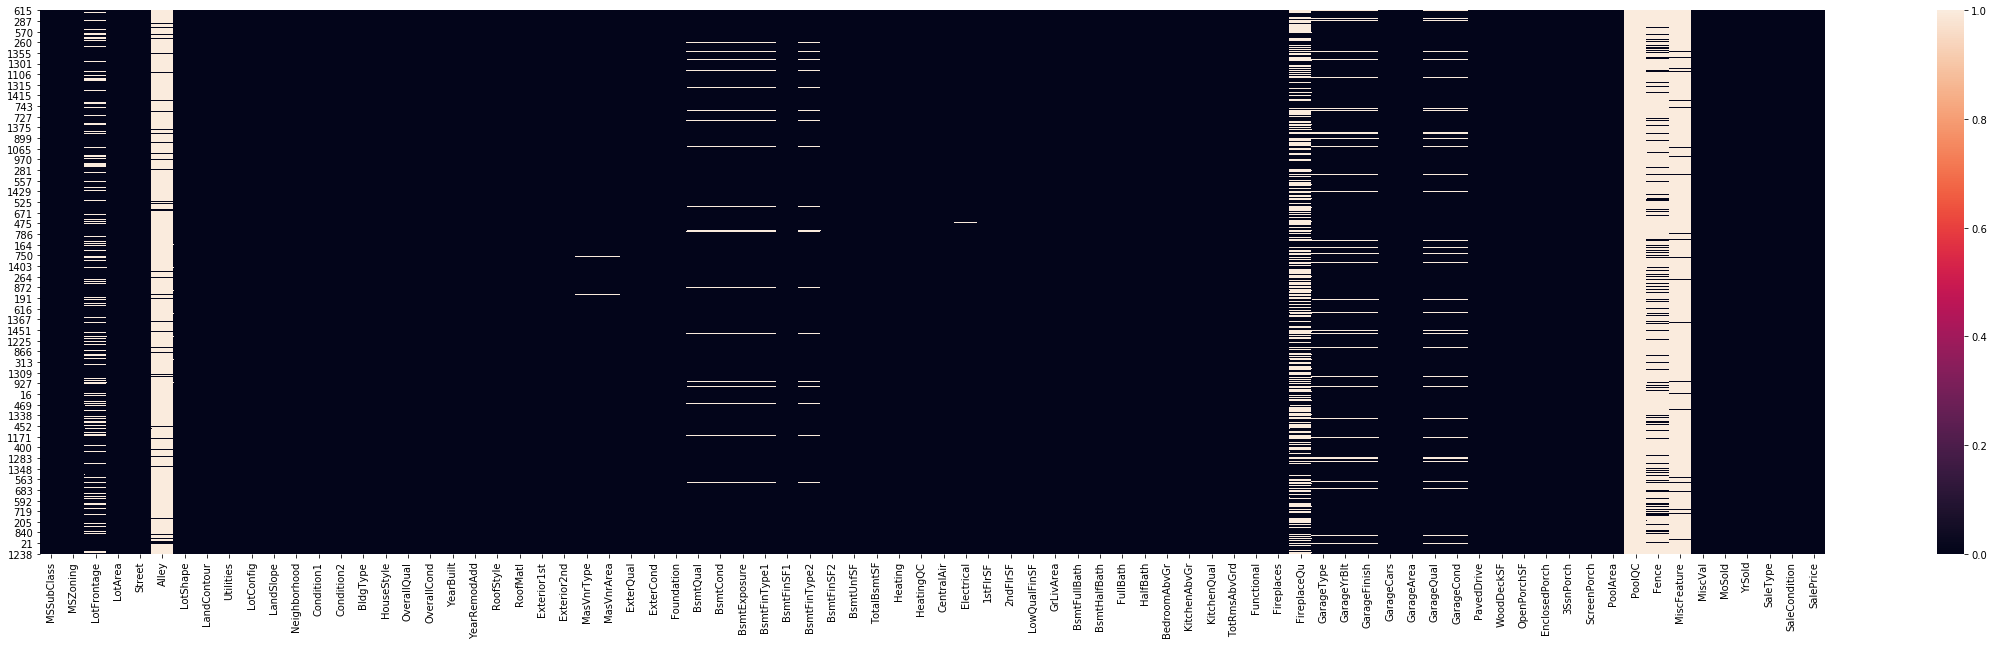

In [15]:
plt.figure(figsize=(40,10))
sb.heatmap(X_train.isnull())

Quite a few missing values on these variables:
 - Fence
 - FirePlaceQu
 - Street
 - LotFrontage

Then also others,with some missing values - Basement and Garage variables. For the vars, that have may missing values, I will explote all four of them and see if its better to just remove them.

In [16]:
values = X_train.isnull().sum().sort_values(ascending=False)/len(X_train)
values = values.head(20)
values

PoolQC          0.995910
MiscFeature     0.960123
Alley           0.935583
Fence           0.804703
FireplaceQu     0.477505
LotFrontage     0.187117
GarageType      0.054192
GarageCond      0.054192
GarageFinish    0.054192
GarageQual      0.054192
GarageYrBlt     0.054192
BsmtFinType2    0.025562
BsmtQual        0.025562
BsmtCond        0.025562
BsmtExposure    0.025562
BsmtFinType1    0.025562
MasVnrArea      0.002045
MasVnrType      0.002045
Electrical      0.001022
RoofMatl        0.000000
dtype: float64

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


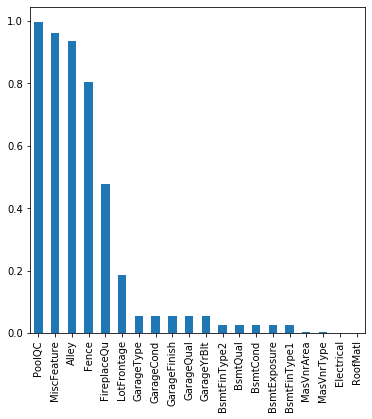

In [17]:
plt.figure(figsize=(6,6))
values.plot('bar')

The plot above plots variables that have missing values. Some variables have almost all missing values. I will breifly investigate these vars and remove them from the set if they do not seem important for the context.

In [18]:
data['PoolQC'].sort_values(ascending=False).head(15)
#categorical variable, only 7 existing values. Seem to be related to pool presence.

1423     Gd
1298     Gd
1170     Gd
1386     Fa
810      Fa
1182     Ex
197      Ex
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
Name: PoolQC, dtype: object

In [19]:
data['PoolArea'].sort_values(ascending=False).head(15)
#seems like only 7 properties in the training set have a pool. However, the area variable
#seems informative on its own, since it marks 0 cases where there is no pool.
#resolution one - instead of imputing missing values on 'PoolQC', will remove the variable alltogether.

1423    738
810     648
1170    576
1182    555
1386    519
197     512
1298    480
485       0
478       0
479       0
480       0
481       0
482       0
483       0
484       0
Name: PoolArea, dtype: int64

In [20]:
print(data['MiscFeature'].unique())
#anothter vategorical var.
data['MiscVal'].sort_values(ascending=False).head(10)
#miscval does not seem to be a related variable. plus a lot of non-missing values.

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


346     15500
1230     8300
705      3500
1457     2500
890      2000
1386     2000
510      2000
539      2000
1171     1400
767      1300
Name: MiscVal, dtype: int64

In [21]:
data['MiscFeature'].sort_values(ascending=False).head(20)
#miscfeature does not seem to be an unimportant variable - there is no alternative variable 
#signifying a special feature in the house. Will impute the missing values with 'missing'

1386    TenC
1457    Shed
626     Shed
611     Shed
589     Shed
539     Shed
510     Shed
502     Shed
499     Shed
439     Shed
392     Shed
338     Shed
335     Shed
250     Shed
249     Shed
214     Shed
106     Shed
99      Shed
98      Shed
95      Shed
Name: MiscFeature, dtype: object

In [22]:
#will make a small function to quickly go over a few variables with missing values
def quicklook(df,df_test, var):
    print(df[var].unique())
    print(df_test[var].value_counts())
    print(df[var].value_counts())
    
quicklook(data, X_test, 'Alley')

#seems like generally, for this question, there could be two answers, either pavement or gravel.
#will impute the missing values using the random sample method to impute the missing values.


[nan 'Grvl' 'Pave']
Pave    19
Grvl     9
Name: Alley, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64


In [23]:
quicklook(data, X_test, 'Fence')
#hard to understand what kind of fence categories these are. Since there does not seem to be 
#other variable in the dataset providing information about teh Fence, will impute the missing
#variables with missing.

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MnPrv    51
GdPrv    22
GdWo     14
MnWw      3
Name: Fence, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [24]:
quicklook(data, X_test, 'FireplaceQu')
#missign values seem to indicate that this is when there is no fireplace. Since there does 
#not seem to be any other fireplace related val, will impute missing with missing

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Gd    132
TA    103
Fa     11
Ex      7
Po      6
Name: FireplaceQu, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


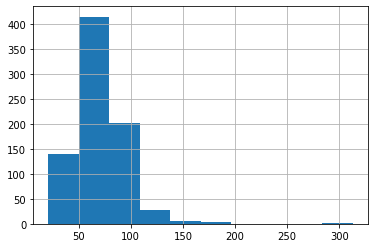

In [25]:
#quicklook(data, X_test, 'LotFrontage')
#is a numeric var. lets see if the remaining vars with missing values are numeric.
X_train['LotFrontage'].hist()
#seems a bit skewed, so will impute the missing values with the median.

In [26]:
#create a list of varnames with mising values
#in order to quickly investigate what other missing vars are numerical
new = X_train.isnull().sum().to_frame('null')
list = new[new['null']>0].index.to_list()

In [27]:
X_train[list].info()
#only 'MasVnrType' and 'GarageYrBlt' are numerics. 
#in adddition, all Bsmt or Basement categorical variables seem to be missing because the property
#simply may not have a basement. thats why I will impute the missing Bsmt variables with a
#missing category. Same reasoning with the Garage variables - will impute all to missing (even the numeric GarageYrBlt).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 19 columns):
LotFrontage     795 non-null float64
Alley           63 non-null object
MasVnrType      976 non-null object
MasVnrArea      976 non-null float64
BsmtQual        953 non-null object
BsmtCond        953 non-null object
BsmtExposure    953 non-null object
BsmtFinType1    953 non-null object
BsmtFinType2    953 non-null object
Electrical      977 non-null object
FireplaceQu     511 non-null object
GarageType      925 non-null object
GarageYrBlt     925 non-null float64
GarageFinish    925 non-null object
GarageQual      925 non-null object
GarageCond      925 non-null object
PoolQC          4 non-null object
Fence           191 non-null object
MiscFeature     39 non-null object
dtypes: float64(3), object(16)
memory usage: 152.8+ KB


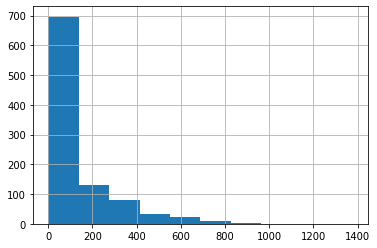

In [28]:
X_train['MasVnrArea'].hist()
#a nighly skewed var. will impute missing values with the median.

In [29]:
quicklook(data, X_test, 'MasVnrType') 
#there is a category None, which indicated that this can be imputed with missing

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
None       306
BrkFace    129
Stone       38
BrkCmn       3
Name: MasVnrType, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [30]:
quicklook(data, X_test, 'Electrical') 
#impute values with missing.

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
SBrkr    438
FuseA     38
FuseF      5
Mix        1
Name: Electrical, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


For dealing with missing values in the datasets, the plan is:
 - remove one variable: 'PoolQc'
 - impute missing values in 'Alley' with a random sample
 - impute missing values in 'LotFontage' and 'MasVnrArea' with the median value of these variables.
 - impute the remaining missing variables (including the 'GarageYrBlt') with "missing"

In [31]:
#remove 'PoolQC'
X_train = X_train.drop('PoolQC', axis=1)
X_test = X_test.drop('PoolQC', axis=1)

In [32]:
#impute missing values in "Alley"
from random import sample 
    
random_sample_train = X_train['Alley'].dropna().sample(X_train['Alley'].isnull().sum(), random_state=0, replace=True)
random_sample_train.index = X_train[X_train['Alley'].isnull()].index
X_train.loc[X_train['Alley'].isnull(), 'Alley'] = random_sample_train

random_sample_test = X_train['Alley'].dropna().sample(X_test['Alley'].isnull().sum(), random_state=0, replace=True)
random_sample_test.index = X_test[X_test['Alley'].isnull()].index
X_test.loc[X_test['Alley'].isnull(), 'Alley'] = random_sample_test


In [33]:
#impute missing values in "LotFrontage" and "MasVnrArea"
for var in ['LotFrontage', 'MasVnrArea']:
    median = X_train[var].median()
    X_train.loc[X_train[var].isnull() , var] = median
    X_test.loc[X_test[var].isnull() , var] = median
  

In [34]:
#impute missing values in the rest of the variables by "missing"
#first, need to select the list of variables
list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [35]:
new_list = ['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence',
 'MiscFeature']

In [36]:
#impute remaining variables except for GarageYrBlt with "Missing"
for element in new_list:
    X_train[element] = X_train[element].fillna('Missing')
    X_test[element] = X_test[element].fillna('Missing')

615     1963.0
613        NaN
1303    2005.0
486     1965.0
561     1975.0
Name: GarageYrBlt, dtype: float64
2010.0


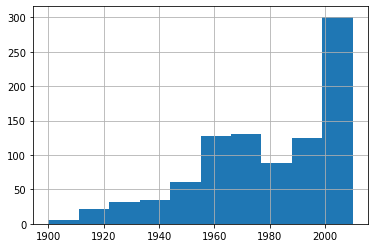

In [37]:
print(X_train['GarageYrBlt'].head())
print(X_train['GarageYrBlt'].max())
X_train['GarageYrBlt'].hist()
#since the variable is numeric, I will impute it with an arbitrary value above the max value - 2020

In [38]:
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(2020) 
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(2020) 

In [39]:
X_train.isnull().sum().sort_values(ascending=False)

SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
Length: 79, dtype: int64

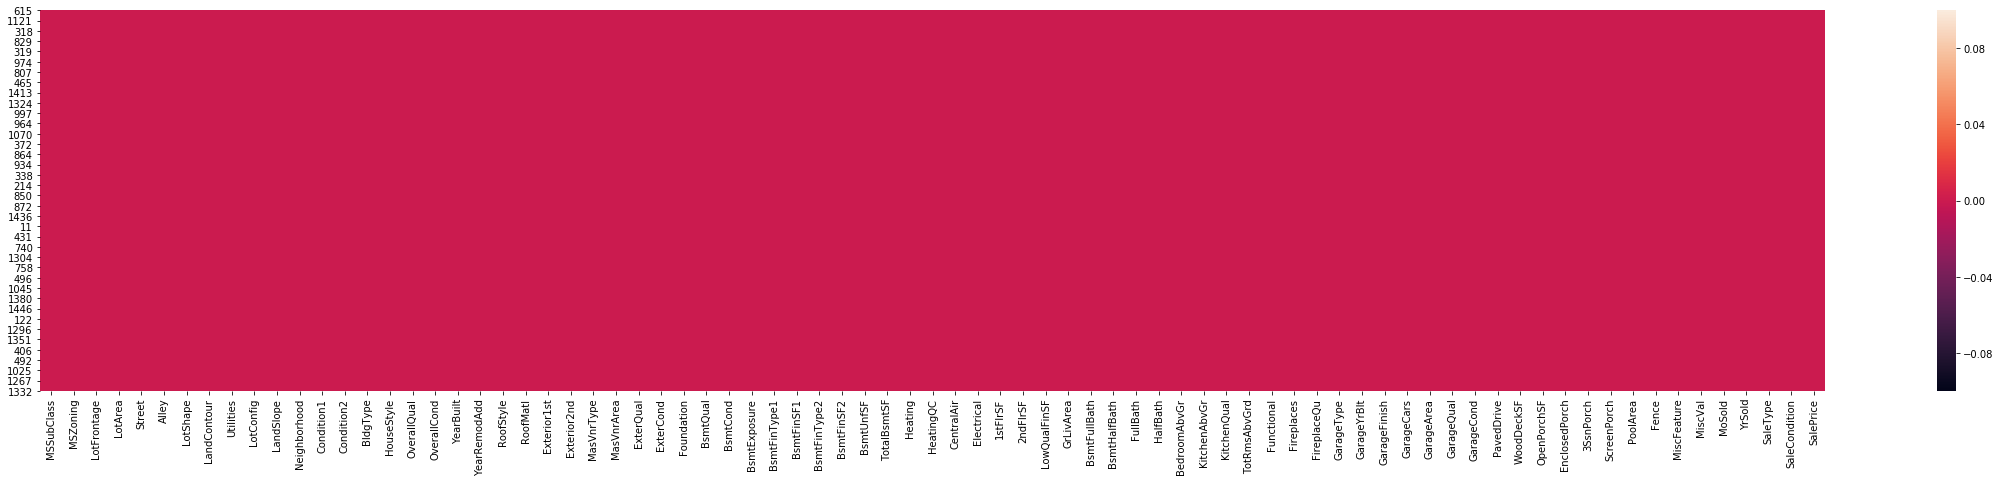

In [40]:
plt.figure(figsize=(40,7))
sb.heatmap(X_train.isnull())

In [41]:
X_test.isnull().sum().sort_values(ascending=False)

SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
Length: 79, dtype: int64

Last step is to save the new X_train and X_test datasets with the imputed missing values.

In [42]:
X_train.to_csv('X_train_1.csv')

In [43]:
X_test.to_csv('X_test_1.csv')

In [44]:
#will save y_train and y_test just in case
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
np.save('y_train', y_train)